#Exercise 6:
#AIM  : Deep pre-trained CNN for feature extraction
* Extract features from the FC1 of VGG network.
* Train any traditional ML model like SVM for classification.
* Repeat the above by considering FC2 of VGG for feature extraction

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
model = VGG16()

553467096/553467096 [==============================] - 16s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# tree-frog

In [ ]:
import matplotlib.pyplot as plt
a="/content/tree_frog.jpeg"

In [ ]:
img_path = '/content/tree_frog.jpeg'
image = load_img(img_path, target_size=(224, 224))


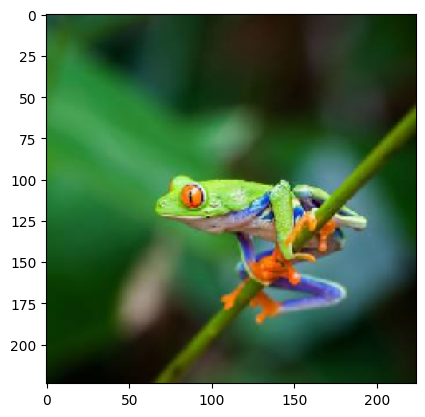

In [ ]:
plt.imshow(image)

In [ ]:
image=img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [ ]:
pred= model.predict(image)

1/1 [==============================] - 8s 8s/step


In [ ]:
label = decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


In [ ]:
print(label)

[[('n01693334', 'green_lizard', 0.4628657), ('n01694178', 'African_chameleon', 0.13648088), ('n01644373', 'tree_frog', 0.10985661), ('n01682714', 'American_chameleon', 0.098215595), ('n02236044', 'mantis', 0.029871736)]]


In [ ]:
print(label[0][0])

('n01693334', 'green_lizard', 0.4628657)


# jelly fish

In [ ]:
image1="/content/jellyfish.jpeg"

In [ ]:
image1= load_img(image1, target_size=(224, 224))

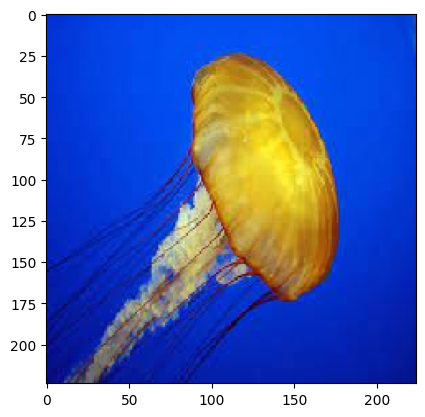

In [ ]:
plt.imshow(image1)

In [ ]:
image1=img_to_array(image1)
image1 = image1.reshape((1, image1.shape[0], image1.shape[1], image1.shape[2]))

In [ ]:
pred1= model.predict(image1)

1/1 [==============================] - 0s 20ms/step


In [ ]:
label1= decode_predictions(pred1)

In [ ]:
print(label1)

[[('n03888257', 'parachute', 0.6981887), ('n01910747', 'jellyfish', 0.22066513), ('n02782093', 'balloon', 0.044965506), ('n02264363', 'lacewing', 0.0058185165), ('n03637318', 'lampshade', 0.005117707)]]


In [ ]:
print(label1[0][1])

('n01910747', 'jellyfish', 0.22066513)


# Extract features for a single image from the FC1 of VGG network:

In [ ]:
base_model = VGG16(weights='imagenet', input_shape = (224,224,3))
base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model2= Model(inputs= base_model.input, outputs= base_model.get_layer('fc1').output)

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
img_path = '/content/tree_frog.jpeg'
image = load_img(img_path, target_size=(224, 224))
image = img_to_array(image)
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
image = preprocess_input(image)
fc1_features = model2.predict(image)
print("Feature vector dimensions: ",fc1_features.shape)

1/1 [==============================] - 0s 150ms/step
Feature vector dimensions:  (1, 4096)


# Extract features for a single image from the fc2 of VGG network:

In [ ]:
model = Model(inputs= base_model.input, outputs= base_model.get_layer('fc2').output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
predictions = model.predict(image)

1/1 [==============================] - 0s 145ms/step


In [ ]:
print(predictions.shape)

(1, 4096)


# Fine tuning using VGG16 pretrained model



In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [ ]:

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 14982474 (57.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
a=model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 53s 29ms/step - loss: 2.3588 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3026 -

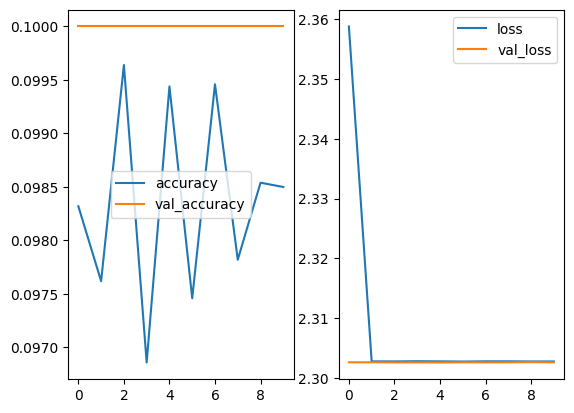

In [ ]:
plt.subplot(1,2,1)
plt.plot(a.history["accuracy"],label="accuracy")
plt.plot(a.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(a.history["loss"],label="loss")
plt.plot(a.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302635908126831, 0.10000000149011612]

In [ ]:
model.save("cifar10_finetune_VGG16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# fc1 feature extraction using vgg16 on cifar10 dataset


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=True)


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import preprocess_input

(x_train, y_train), (x_test,y_test) = cifar10.load_data()
# x_train = preprocess_input(x_train)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

features_train = model.predict(x_train)
features_test = model.predict(x_test)


313/313 [==============================] - 2s 6ms/step


In [ ]:
features_train = features_train.reshape(features_train.shape[0], -1)
features_test = features_test.reshape(features_test.shape[0], -1)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(C=1.0, kernel='rbf', gamma='auto')

svm_classifier.fit(features_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [ ]:
y_pred_test = svm_classifier.predict(features_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.1
